In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale

import researchpy as rp
from scipy import stats

In [2]:
bike_data = pd.read_csv('datasets/day.csv')

In [3]:
bike_data.shape

(731, 16)

In [4]:
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [5]:
bike_data = bike_data[['season',
                      'mnth',
                      'holiday',
                      'workingday',
                      'weathersit',
                      'temp',
                      'cnt']]

In [6]:
bike_data.to_csv('datasets/bike_data_processed.csv')

In [7]:
bike_data.head()

,season,mnth,holiday,workingday,weathersit,temp,cnt
0,1,1,0,0,2,0.344167,985
1,1,1,0,0,2,0.363478,801
2,1,1,0,1,1,0.196364,1349
3,1,1,0,1,1,0.200000,1562
4,1,1,0,1,1,0.226957,1600


In [8]:
bike_data.groupby('workingday')['cnt'].describe()

,count,mean,std,min,25%,50%,75%,max
workingday,,,,,,,,
0,231.0,4330.168831,2052.141245,605.0,2710.50,4459.0,5907.5,8714.0
1,500.0,4584.820000,1878.415583,22.0,3344.25,4582.0,5987.5,8362.0


<Axes: title={'center': 'cnt'}, xlabel='workingday'>

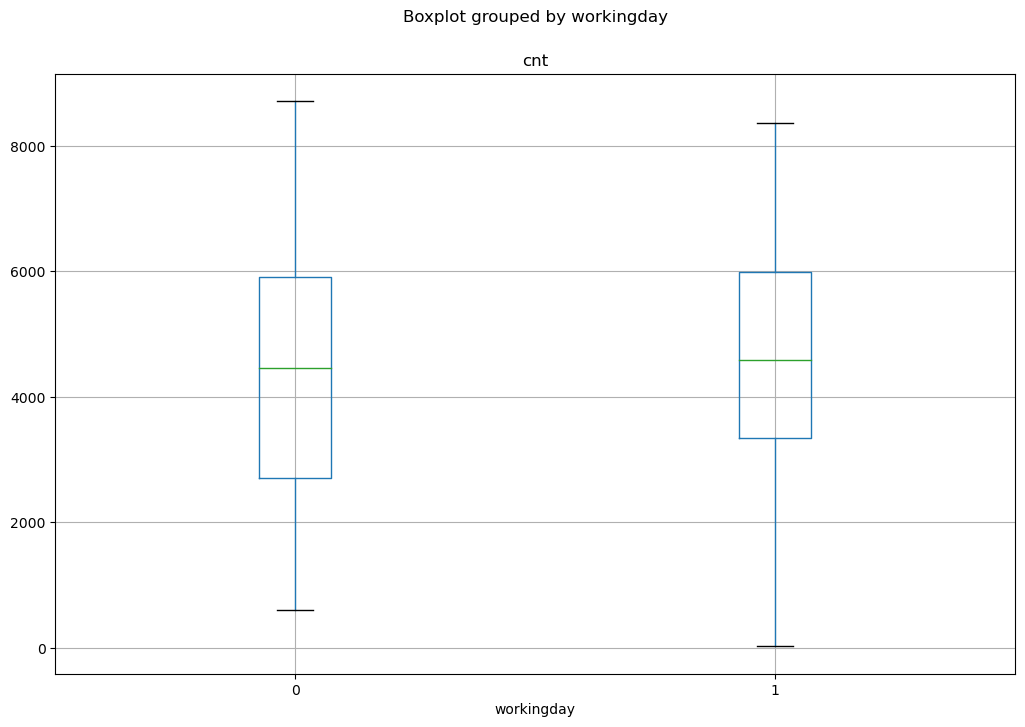

In [29]:
bike_data.boxplot(column=['cnt'],by='workingday', figsize=(12,8))



In [30]:
bike_data[(bike_data['workingday']==1)].sample(231)

,season,mnth,holiday,workingday,weathersit,temp,cnt
639,4,10,0,1,2,0.520833,6778
67,1,3,0,1,2,0.295833,1891
311,4,11,0,1,1,0.408333,4205
678,4,11,0,1,1,0.361667,5992
437,1,3,0,1,1,0.565000,5847
...,...,...,...,...,...,...,...
100,2,4,0,1,2,0.595652,3348
115,2,4,0,1,1,0.631667,4400
692,4,11,0,1,1,0.368333,3910
430,1,3,0,1,1,0.258333,3956


In [44]:
##in preperation for t-test we will split our data into two samples
samp1=bike_data[(bike_data['workingday']==1)]
samp2=bike_data[(bike_data['workingday']==0)]

In [45]:
samp1.shape,samp2.shape

((500, 7), (231, 7))

In [47]:
samp1 = samp1.sample(231)

In [34]:
##check to see if assumptions for t test are satisfied

In [35]:
##levenes test will tell us if the variance between the two groups is the same

C:\Users\aerap\AppData\Local\Temp\ipykernel_884\2452799540.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  diff = scale(np.array(samp1['cnt'])- np.array(samp2['cnt'],dtype=np.float))


(array([ 1.,  5., 12., 26., 49., 39., 42., 33., 16.,  8.]),
 array([-3.03337225, -2.49267162, -1.951971  , -1.41127037, -0.87056974,
        -0.32986911,  0.21083151,  0.75153214,  1.29223277,  1.8329334 ,
         2.37363403]),
 <BarContainer object of 10 artists>)

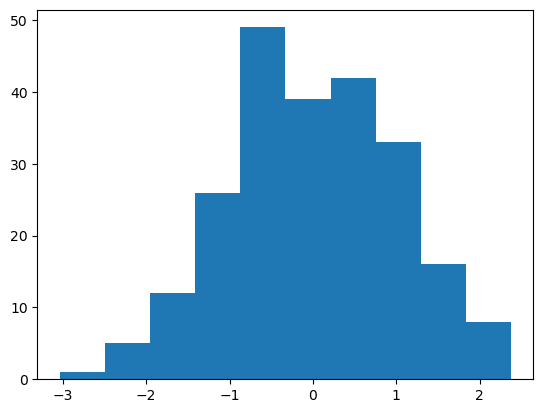

In [48]:
diff = scale(np.array(samp1['cnt'])- np.array(samp2['cnt'],dtype=np.float))
plt.hist(diff)

In [40]:
#checking normality by Q-Q plot graph

In [41]:
#our dependent variable is the count of the bikers on the working day

In [52]:
stats.levene(samp1['cnt'],samp2['cnt'])

LeveneResult(statistic=2.1640972845742037, pvalue=0.1419512847889598)

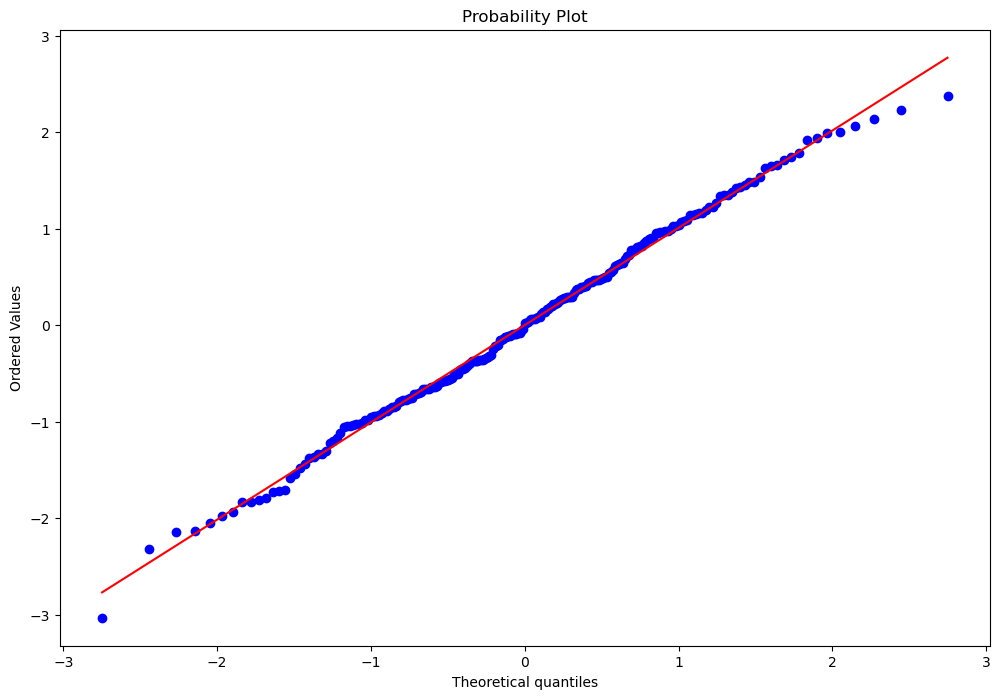

In [55]:
plt.figure(figsize=(12,8))
stats.probplot(diff,plot=plt, dist='norm')
plt.show()

In [56]:
stats.shapiro(diff)

ShapiroResult(statistic=0.995621383190155, pvalue=0.7565078735351562)

In [57]:
stats.ttest_ind(samp1['cnt'],samp2['cnt'])

Ttest_indResult(statistic=0.9984439187027597, pvalue=0.3185890649050881)

In [58]:
descriptives, results = rp.ttest(samp1['cnt'],samp2['cnt'])

C:\Users\aerap\anaconda3\lib\site-packages\researchpy\ttest.py:38: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  groups = group1.append(group2, ignore_index= True)


In [59]:
descriptives

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,cnt,231.0,4514.125541,1905.297246,125.359355,4267.126020,4761.125062
1,cnt,231.0,4330.168831,2052.141245,135.020981,4064.132702,4596.204960
2,combined,462.0,4422.147186,1980.074290,92.121393,4241.117298,4603.177074


In [60]:
print(results)

          Independent t-test   results
0  Difference (cnt - cnt) =   183.9567
1      Degrees of freedom =   460.0000
2                       t =     0.9984
3   Two side test p value =     0.3186
4  Difference < 0 p value =     0.8407
5  Difference > 0 p value =     0.1593
6               Cohen's d =     0.0929
7               Hedge's g =     0.0928
8          Glass's delta1 =     0.0966
9        Point-Biserial r =     0.0465
